In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
import scikit_posthocs as sp
import pingouin as pg
from scipy import stats
from scipy.stats import friedmanchisquare

In [2]:
input_path = r'/Volumes/Behaviour/Tailored 3sec 2P Trials'
output_path = r'/Volumes/Behaviour/Tailored 3sec 2P Trials/Population mean correlations on concatenated trials'
stimuli = ['warm', 'hot', 'opto', 'off-target', 'von frey', 'pin-prick', 'approach', 'no stim']
sessions = [session for session in os.listdir(input_path) if session.endswith('.csv')]
len(sessions)

48

In [3]:
# COMPUTE CORRELATIONS FOR EACH NEURON AGAINST POPULATION MEAN PRE/POST STIMULUS 
session_names = []
ses_ave = pd.DataFrame()

for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    if session.endswith('2P08_Ses03.csv'): # doens't have opto trials ...
        continue
    #if session.endswith('CFA.csv'): # excluding for the time being CFA sessions
        #continue
    
    print('processing: ', session)
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3]+'_'+entries[4][:5]
            
    print(ses_name)
    session_names.append(ses_name)
    
    cells = pd.read_csv(os.path.join(input_path,session), index_col=0)
    cell_ids = list(cells.columns[:-1])
    
    li = []
    
    for s in stimuli:
        pre = pd.DataFrame()
        post = pd.DataFrame()
        modality = cells[cells['identifier'].str.contains(str((s)))]
        trials = modality['identifier'].unique()
        
        for t in trials:
            trial = modality[modality['identifier']==t]
            preS = trial[:9]
            pre = pd.concat([pre, preS])
            postS = trial[10:]
            post = pd.concat([post, postS])
            
        # calculate and plot pair-wise correlation of concatenated trials for each cell by modality
        pre = pre.drop('identifier', axis=1)
        pre_mean = pre.mean(axis=1)
        post = post.drop('identifier', axis=1)
        post_mean = post.mean(axis=1)
    
        for c in cell_ids: # for each cell in a session, compute Pearsons' r by correlating with population mean
            P,_ = pearsonr(pre[c],pre_mean)
            li.append((ses_name, s, 'pre', c, P))
            P,_ = pearsonr(post[c],post_mean)
            li.append((ses_name, s, 'post', c, P))    
        
    cols = ['session', 'modality', 'pre/post', 'cell',  'Pearsons R']
    pop_corr = pd.DataFrame(li, columns=cols)
#     pop_corr.to_csv(os.path.join(output_path, 'pop_corr_'+ses_name+'.csv'))

#     ax = sns.boxplot(x="modality", y="Pearsons R", hue="pre/post", data=pop_corr, color='.3')
#     ax.legend(bbox_to_anchor= (1.2,1))
#     ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#     plt.ylim(-1,1)
#     ax.set(title= ses_name+': Pearsons R for each cell against population mean')
#     plt.savefig(os.path.join(output_path, ses_name+'_pop_corr.png'), bbox_inches='tight')
#     plt.show()
    
    averages = []
    for s in stimuli:
        stim = pop_corr[pop_corr['modality']==s]
        pre_ave = stim[stim['pre/post']=='pre']['Pearsons R'].mean(axis=0)
        averages.append((ses_name, s, 'pre', pre_ave))
        post_ave = stim[stim['pre/post']=='post']['Pearsons R'].mean(axis=0)
        averages.append((ses_name, s, 'post', post_ave))
    all_pre = pop_corr[pop_corr['pre/post']=='pre']['Pearsons R'].mean(axis=0)
    averages.append([ses_name, 'session mean', 'pre', all_pre])
    all_post = pop_corr[pop_corr['pre/post']=='post']['Pearsons R'].mean(axis=0)
    averages.append([ses_name, 'session mean', 'post', all_post])
    cols = ['session', 'modality', 'pre/post', 'mean population R']
    df = pd.DataFrame(averages, columns=cols)

    ses_ave = pd.concat([ses_ave, df])



processing:  dF_F0_SHORT_2P06_Ses01.csv
2P06_Ses01
processing:  dF_F0_SHORT_2P06_Ses02.csv
2P06_Ses02
processing:  dF_F0_SHORT_2P06_Ses03.csv
2P06_Ses03
processing:  dF_F0_SHORT_2P05_Ses04.csv
2P05_Ses04
processing:  dF_F0_SHORT_2P06_Ses04.csv
2P06_Ses04
processing:  dF_F0_SHORT_2P06_Ses05.csv
2P06_Ses05
processing:  dF_F0_SHORT_2P05_Ses06.csv
2P05_Ses06
processing:  dF_F0_SHORT_2P06_Ses06.csv
2P06_Ses06
processing:  dF_F0_SHORT_2P05_Ses07.csv
2P05_Ses07
processing:  dF_F0_SHORT_2P06_Ses07.csv
2P06_Ses07
processing:  dF_F0_SHORT_2P07_Ses01.csv
2P07_Ses01
processing:  dF_F0_SHORT_2P08_Ses01.csv
2P08_Ses01
processing:  dF_F0_SHORT_2P07_Ses03.csv
2P07_Ses03
processing:  dF_F0_SHORT_2P08_Ses02.csv
2P08_Ses02
processing:  dF_F0_SHORT_2P07_Ses04.csv
2P07_Ses04
processing:  dF_F0_SHORT_2P07_Ses05.csv
2P07_Ses05
processing:  dF_F0_SHORT_2P08_Ses04.csv
2P08_Ses04
processing:  dF_F0_SHORT_2P07_Ses06.csv
2P07_Ses06
processing:  dF_F0_SHORT_2P08_Ses05.csv
2P08_Ses05
processing:  dF_F0_SHORT_2P07_S

In [29]:
ses_ave['mouse'] = ses_ave['session'].apply(lambda x: x[:4])
ses_ave['cfa'] = ses_ave['session'].apply(lambda x: 'cfa' if 'CFA' in x else 'health') 
#ses_ave.to_csv(os.path.join(output_path, 'population correlation session means.csv'))
ses_ave = pd.read_csv(os.path.join(output_path, 'population correlation session means.csv'), index_col=0)
health = ses_ave.loc[ses_ave['session'].str.contains('Ses')]
cfa = ses_ave.loc[ses_ave['session'].str.contains('CFA')]
pre = ses_ave.loc[ses_ave['pre/post']=='pre']
post = ses_ave.loc[ses_ave['pre/post']=='post']
ses_ave.head()

,session,modality,pre/post,mean population R,mouse,cfa
0,2P06_Ses01,warm,pre,0.122387,2P06,health
1,2P06_Ses01,warm,post,0.063881,2P06,health
2,2P06_Ses01,hot,pre,0.055157,2P06,health
3,2P06_Ses01,hot,post,0.103397,2P06,health
4,2P06_Ses01,opto,pre,0.083836,2P06,health


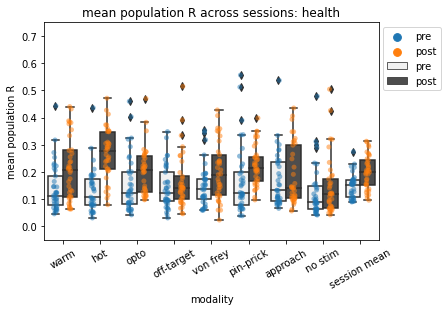

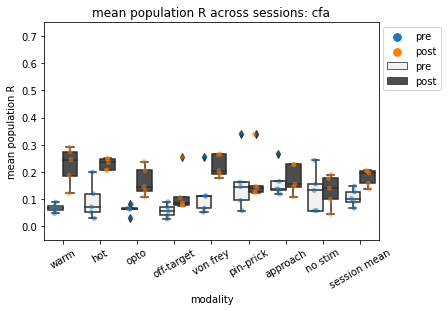

In [5]:
# COMPARE CORRELATION TO POPULATION MEAN BETWEEN PRE & POST EPOCH
ax = sns.stripplot(x="modality", y="mean population R", hue="pre/post", data=health, alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean population R", hue="pre/post", data=health, color='.3')
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(-0.05,0.75)
ax.set(title='mean population R across sessions: health')
#plt.savefig(os.path.join(output_path, 'population R by session health.png'), bbox_inches='tight')
plt.show()

ax = sns.stripplot(x="modality", y="mean population R", hue="pre/post", data=cfa, alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean population R", hue="pre/post", data=cfa, color='.3')
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(-0.05, 0.75)
ax.set(title='mean population R across sessions: cfa')
#plt.savefig(os.path.join(output_path, 'population R by session cfa.png'), bbox_inches='tight')
plt.show()

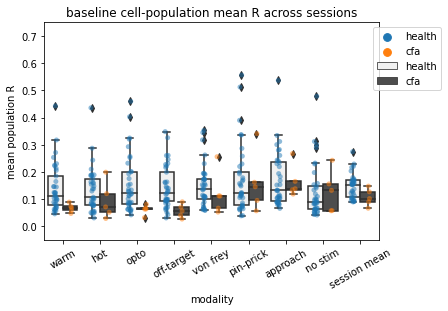

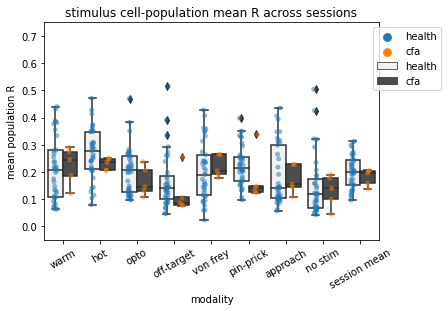

warm pre-stim pop R:  153.0 0.016234300573196594
hot pre-stim pop R:  121.0 0.28639375173393145
off_target pre-stim pop R:  165.0 0.002644980180281849
von_frey pre-stim pop R:  117.0 0.36228704970681863
pin_prick pre-stim pop R:  95.0 0.940021253885182
approach pre-stim pop R:  75.0 0.520492130890077
opto pre-stim pop R:  155.0 0.01252192394682767
no_stim pre-stim pop R:  84.0 0.7631931611392458
session mean pre-stim pop R:  148.0 0.029435690539669997
warm post-stim pop R:  76.0 0.5455265744097579
hot post-stim pop R:  126.0 0.20685860993948282
off_target post-stim pop R:  130.0 0.15514160636111854
von_frey post-stim pop R:  72.0 0.44890368510394185
pin_prick post-stim pop R:  137.0 0.08781569307885097
approach post-stim pop R:  80.0 0.6508767227637573
opto post-stim pop R:  116.0 0.3829531615154208
no_stim post-stim pop R:  87.0 0.8507361273728411
session mean post-stim pop R:  111.0 0.49603135418283045


In [6]:
# COMPARE CORRELATION TO POPULATION MEAN BETWEEN HEALTH AND CFA ALL SESSIONS
ax = sns.stripplot(x="modality", y="mean population R", hue="cfa", data=pre, alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean population R", hue="cfa", data=pre, color='.3')
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(-0.05,0.75)
ax.set(title='baseline cell-population mean R across sessions')
#plt.savefig(os.path.join(output_path, 'baseline population R all sessions.png'), bbox_inches='tight')
plt.show()

ax = sns.stripplot(x="modality", y="mean population R", hue="cfa", data=post, alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean population R", hue="cfa", data=post, color='.3')
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(-0.05, 0.75)
ax.set(title='stimulus cell-population mean R across sessions')
#plt.savefig(os.path.join(output_path, 'stimulus population R all sessions.png'), bbox_inches='tight')
plt.show()

# Non-parametric t-test for each modality pair: pre-stimulus cell to population R (all sessions) vs cfa
warm_h = pre[(pre['modality']=='warm') & (pre['cfa']=='health')]['mean population R']
hot_h = pre[(pre['modality']=='hot') & (pre['cfa']=='health')]['mean population R']
off_target_h = pre[(pre['modality']=='off-target') & (pre['cfa']=='health')]['mean population R']
von_frey_h = pre[(pre['modality']=='von frey') & (pre['cfa']=='health')]['mean population R']
pin_prick_h = pre[(pre['modality']=='pin-prick') & (pre['cfa']=='health')]['mean population R']
approach_h = pre[(pre['modality']=='approach') & (pre['cfa']=='health')]['mean population R']
opto_h = pre[(pre['modality']=='opto') & (pre['cfa']=='health')]['mean population R']
no_stim_h = pre[(pre['modality']=='no stim') & (pre['cfa']=='health')]['mean population R']
ses_mean_h = pre[(pre['modality']=='session mean') & (pre['cfa']=='health')]['mean population R']

warm_c = pre[(pre['modality']=='warm') & (pre['cfa']=='cfa')]['mean population R']
hot_c = pre[(pre['modality']=='hot') & (pre['cfa']=='cfa')]['mean population R']
off_target_c = pre[(pre['modality']=='off-target') & (pre['cfa']=='cfa')]['mean population R']
von_frey_c = pre[(pre['modality']=='von frey') & (pre['cfa']=='cfa')]['mean population R']
pin_prick_c = pre[(pre['modality']=='pin-prick') & (pre['cfa']=='cfa')]['mean population R']
approach_c = pre[(pre['modality']=='approach') & (pre['cfa']=='cfa')]['mean population R']
opto_c = pre[(pre['modality']=='opto') & (pre['cfa']=='cfa')]['mean population R']
no_stim_c = pre[(pre['modality']=='no stim') & (pre['cfa']=='cfa')]['mean population R']
ses_mean_c = pre[(pre['modality']=='session mean') & (pre['cfa']=='cfa')]['mean population R']

U1, p = mannwhitneyu(np.array(warm_h), np.array(warm_c))
print('warm pre-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(hot_h), np.array(hot_c))
print('hot pre-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(off_target_h), np.array(off_target_c))
print('off_target pre-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(von_frey_h), np.array(von_frey_c))
print('von_frey pre-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(pin_prick_h), np.array(pin_prick_c))
print('pin_prick pre-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(approach_h), np.array(approach_c))
print('approach pre-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(opto_h), np.array(opto_c))
print('opto pre-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(no_stim_h), np.array(no_stim_c))
print('no_stim pre-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(ses_mean_h), np.array(ses_mean_c))
print('session mean pre-stim pop R: ', U1, p)


# Non-parametric t-test for each modality pair: post-stimulus cell to population R (all sessions) vs cfa
warm_h = post[(post['modality']=='warm') & (post['cfa']=='health')]['mean population R']
hot_h = post[(post['modality']=='hot') & (post['cfa']=='health')]['mean population R']
off_target_h = post[(post['modality']=='off-target') & (post['cfa']=='health')]['mean population R']
von_frey_h = post[(post['modality']=='von frey') & (post['cfa']=='health')]['mean population R']
pin_prick_h = post[(post['modality']=='pin-prick') & (post['cfa']=='health')]['mean population R']
approach_h = post[(post['modality']=='approach') & (post['cfa']=='health')]['mean population R']
opto_h = post[(post['modality']=='opto') & (post['cfa']=='health')]['mean population R']
no_stim_h = post[(post['modality']=='no stim') & (post['cfa']=='health')]['mean population R']
ses_mean_h = post[(post['modality']=='session mean') & (post['cfa']=='health')]['mean population R']

warm_c = post[(post['modality']=='warm') & (post['cfa']=='cfa')]['mean population R']
hot_c = post[(post['modality']=='hot') & (post['cfa']=='cfa')]['mean population R']
off_target_c = post[(post['modality']=='off-target') & (post['cfa']=='cfa')]['mean population R']
von_frey_c = post[(post['modality']=='von frey') & (post['cfa']=='cfa')]['mean population R']
pin_prick_c = post[(post['modality']=='pin-prick') & (post['cfa']=='cfa')]['mean population R']
approach_c = post[(post['modality']=='approach') & (post['cfa']=='cfa')]['mean population R']
opto_c = post[(post['modality']=='opto') & (post['cfa']=='cfa')]['mean population R']
no_stim_c = post[(post['modality']=='no stim') & (post['cfa']=='cfa')]['mean population R']
ses_mean_c = post[(post['modality']=='session mean') & (post['cfa']=='cfa')]['mean population R']

U1, p = mannwhitneyu(np.array(warm_h), np.array(warm_c))
print('warm post-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(hot_h), np.array(hot_c))
print('hot post-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(off_target_h), np.array(off_target_c))
print('off_target post-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(von_frey_h), np.array(von_frey_c))
print('von_frey post-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(pin_prick_h), np.array(pin_prick_c))
print('pin_prick post-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(approach_h), np.array(approach_c))
print('approach post-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(opto_h), np.array(opto_c))
print('opto post-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(no_stim_h), np.array(no_stim_c))
print('no_stim post-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(ses_mean_h), np.array(ses_mean_c))
print('session mean post-stim pop R: ', U1, p)




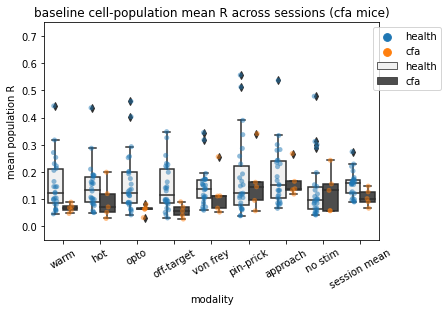

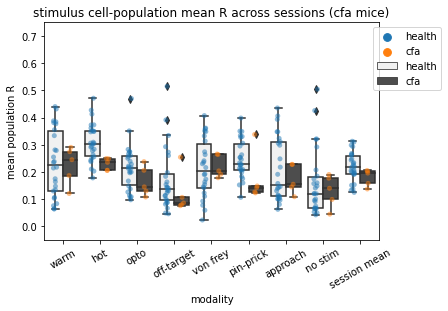

warm pre-stim pop R:  109.0 0.015843588702320624
hot pre-stim pop R:  90.0 0.19470193218802784
off_target pre-stim pop R:  114.0 0.005991371953552154
von_frey pre-stim pop R:  84.0 0.33112629553118983
pin_prick pre-stim pop R:  67.0 0.9378203883209443
approach pre-stim pop R:  62.0 0.8965634950062089
opto pre-stim pop R:  113.0 0.007392105278645879
no_stim pre-stim pop R:  57.0 0.6960114412839662
session mean pre-stim pop R:  107.0 0.022270482782162423
warm post-stim pop R:  64.0 0.9792656155281292
hot post-stim pop R:  113.0 0.007392105278645879
off_target post-stim pop R:  91.0 0.17642177375214083
von_frey post-stim pop R:  58.0 0.7350318696258629
pin_prick post-stim pop R:  103.0 0.041292205919569655
approach post-stim pop R:  67.0 0.9378203883209443
opto post-stim pop R:  90.0 0.19470193218802784
no_stim post-stim pop R:  66.0 0.9792656155281292
session mean post-stim pop R:  94.0 0.12883215330378844


In [30]:
# COMPARE CORRELATION TO POPULATION MEAN BETWEEN HEALTH AND CFA (CFA MICE ONLY)
ses_ave = pd.read_csv(os.path.join(output_path, 'population correlation session means.csv'), index_col=0)
cfa_mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
ses_ave = ses_ave.loc[ses_ave['mouse'].isin(cfa_mice)]
pre = ses_ave.loc[ses_ave['pre/post']=='pre']
post = ses_ave.loc[ses_ave['pre/post']=='post']
post.head()

ax = sns.stripplot(x="modality", y="mean population R", hue="cfa", data=pre, alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean population R", hue="cfa", data=pre, color='.3')
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(-0.05,0.75)
ax.set(title='baseline cell-population mean R across sessions (cfa mice)')
#plt.savefig(os.path.join(output_path, 'baseline population R cfa mice.png'), bbox_inches='tight')
plt.show()

ax = sns.stripplot(x="modality", y="mean population R", hue="cfa", data=post, alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean population R", hue="cfa", data=post, color='.3')
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(-0.05, 0.75)
ax.set(title='stimulus cell-population mean R across sessions (cfa mice)')
#plt.savefig(os.path.join(output_path, 'stimulus population R cfa mice.png'), bbox_inches='tight')
plt.show()

# Non-parametric t-test for each modality pair: pre-stimulus cell to population R (all sessions) vs cfa
warm_h = pre[(pre['modality']=='warm') & (pre['cfa']=='health')]['mean population R']
hot_h = pre[(pre['modality']=='hot') & (pre['cfa']=='health')]['mean population R']
off_target_h = pre[(pre['modality']=='off-target') & (pre['cfa']=='health')]['mean population R']
von_frey_h = pre[(pre['modality']=='von frey') & (pre['cfa']=='health')]['mean population R']
pin_prick_h = pre[(pre['modality']=='pin-prick') & (pre['cfa']=='health')]['mean population R']
approach_h = pre[(pre['modality']=='approach') & (pre['cfa']=='health')]['mean population R']
opto_h = pre[(pre['modality']=='opto') & (pre['cfa']=='health')]['mean population R']
no_stim_h = pre[(pre['modality']=='no stim') & (pre['cfa']=='health')]['mean population R']
ses_mean_h = pre[(pre['modality']=='session mean') & (pre['cfa']=='health')]['mean population R']

warm_c = pre[(pre['modality']=='warm') & (pre['cfa']=='cfa')]['mean population R']
hot_c = pre[(pre['modality']=='hot') & (pre['cfa']=='cfa')]['mean population R']
off_target_c = pre[(pre['modality']=='off-target') & (pre['cfa']=='cfa')]['mean population R']
von_frey_c = pre[(pre['modality']=='von frey') & (pre['cfa']=='cfa')]['mean population R']
pin_prick_c = pre[(pre['modality']=='pin-prick') & (pre['cfa']=='cfa')]['mean population R']
approach_c = pre[(pre['modality']=='approach') & (pre['cfa']=='cfa')]['mean population R']
opto_c = pre[(pre['modality']=='opto') & (pre['cfa']=='cfa')]['mean population R']
no_stim_c = pre[(pre['modality']=='no stim') & (pre['cfa']=='cfa')]['mean population R']
ses_mean_c = pre[(pre['modality']=='session mean') & (pre['cfa']=='cfa')]['mean population R']

U1, p = mannwhitneyu(np.array(warm_h), np.array(warm_c))
print('warm pre-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(hot_h), np.array(hot_c))
print('hot pre-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(off_target_h), np.array(off_target_c))
print('off_target pre-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(von_frey_h), np.array(von_frey_c))
print('von_frey pre-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(pin_prick_h), np.array(pin_prick_c))
print('pin_prick pre-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(approach_h), np.array(approach_c))
print('approach pre-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(opto_h), np.array(opto_c))
print('opto pre-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(no_stim_h), np.array(no_stim_c))
print('no_stim pre-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(ses_mean_h), np.array(ses_mean_c))
print('session mean pre-stim pop R: ', U1, p)


# Non-parametric t-test for each modality pair: post-stimulus cell to population R (all sessions) vs cfa
warm_h = post[(post['modality']=='warm') & (post['cfa']=='health')]['mean population R']
hot_h = post[(post['modality']=='hot') & (post['cfa']=='health')]['mean population R']
off_target_h = post[(post['modality']=='off-target') & (post['cfa']=='health')]['mean population R']
von_frey_h = post[(post['modality']=='von frey') & (post['cfa']=='health')]['mean population R']
pin_prick_h = post[(post['modality']=='pin-prick') & (post['cfa']=='health')]['mean population R']
approach_h = post[(post['modality']=='approach') & (post['cfa']=='health')]['mean population R']
opto_h = post[(post['modality']=='opto') & (post['cfa']=='health')]['mean population R']
no_stim_h = post[(post['modality']=='no stim') & (post['cfa']=='health')]['mean population R']
ses_mean_h = post[(post['modality']=='session mean') & (post['cfa']=='health')]['mean population R']

warm_c = post[(post['modality']=='warm') & (post['cfa']=='cfa')]['mean population R']
hot_c = post[(post['modality']=='hot') & (post['cfa']=='cfa')]['mean population R']
off_target_c = post[(post['modality']=='off-target') & (post['cfa']=='cfa')]['mean population R']
von_frey_c = post[(post['modality']=='von frey') & (post['cfa']=='cfa')]['mean population R']
pin_prick_c = post[(post['modality']=='pin-prick') & (post['cfa']=='cfa')]['mean population R']
approach_c = post[(post['modality']=='approach') & (post['cfa']=='cfa')]['mean population R']
opto_c = post[(post['modality']=='opto') & (post['cfa']=='cfa')]['mean population R']
no_stim_c = post[(post['modality']=='no stim') & (post['cfa']=='cfa')]['mean population R']
ses_mean_c = post[(post['modality']=='session mean') & (post['cfa']=='cfa')]['mean population R']

U1, p = mannwhitneyu(np.array(warm_h), np.array(warm_c))
print('warm post-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(hot_h), np.array(hot_c))
print('hot post-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(off_target_h), np.array(off_target_c))
print('off_target post-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(von_frey_h), np.array(von_frey_c))
print('von_frey post-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(pin_prick_h), np.array(pin_prick_c))
print('pin_prick post-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(approach_h), np.array(approach_c))
print('approach post-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(opto_h), np.array(opto_c))
print('opto post-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(no_stim_h), np.array(no_stim_c))
print('no_stim post-stim pop R: ', U1, p)

U1, p = mannwhitneyu(np.array(ses_mean_h), np.array(ses_mean_c))
print('session mean post-stim pop R: ', U1, p)





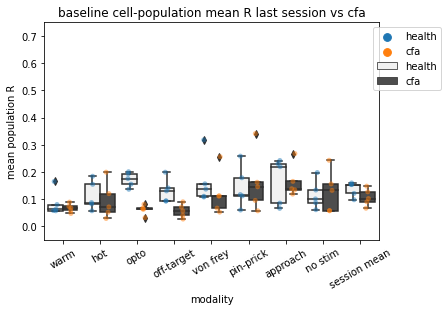

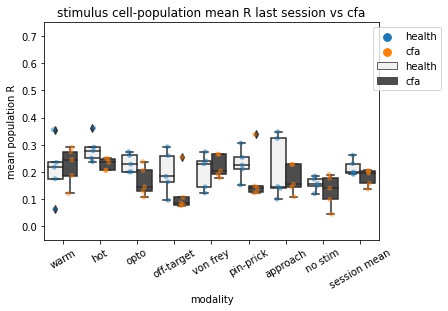

warm pre-stim popR:  4.0 0.4375
hot pre-stim popR:  6.0 0.8125
off target pre-stim popR:  0.0 0.0625
von frey pre-stim popR:  0.0 0.0625
pin-prick pre-stim popR:  5.0 0.625
approach pre-stim popR:  6.0 0.8125
opto pre-stim popR:  0.0 0.0625
no stimulation pre-stim popR:  4.0 0.4375
session mean pre-stim popR:  0.0 0.0625
warm pre-stim popR:  5.0 0.625
hot pre-stim popR:  1.0 0.125
off target pre-stim popR:  3.0 0.3125
von frey pre-stim popR:  5.0 0.625
pin-prick pre-stim popR:  3.0 0.3125
approach pre-stim popR:  6.0 0.8125
opto pre-stim popR:  3.0 0.3125
no stimulation pre-stim popR:  3.0 0.3125
session mean pre-stim popR:  2.0 0.1875


In [31]:
# COMPARE CORRELATION TO POPULATION MEAN BETWEEN HEALTH LAST SESSION AND CFA
ses_ave = pd.read_csv(os.path.join(output_path, 'population correlation session means.csv'), index_col=0)
last_session = ['2P07_Ses07', '2P08_Ses06', '2P09_Ses05', '2P10_Ses05', '2P11_Ses06']
ses_ave = ses_ave.loc[ses_ave['session'].str.contains('CFA')|ses_ave['session'].isin(last_session)]
pre = ses_ave.loc[ses_ave['pre/post']=='pre']
post = ses_ave.loc[ses_ave['pre/post']=='post']
post.head()

ax = sns.stripplot(x="modality", y="mean population R", hue="cfa", data=pre, alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean population R", hue="cfa", data=pre, color='.3')
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(-0.05,0.75)
ax.set(title='baseline cell-population mean R last session vs cfa')
#plt.savefig(os.path.join(output_path, 'baseline population R last vs cfa.png'), bbox_inches='tight')
plt.show()

ax = sns.stripplot(x="modality", y="mean population R", hue="cfa", data=post, alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean population R", hue="cfa", data=post, color='.3')
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(-0.05, 0.75)
ax.set(title='stimulus cell-population mean R last session vs cfa')
#plt.savefig(os.path.join(output_path, 'stimulus population R last vs cfa.png'), bbox_inches='tight')
plt.show()

# Non-parametric t-test for each modality pair: pre-stimulus cell to population R last session vs cfa
warm_h = pre[(pre['modality']=='warm') & (pre['cfa']=='health')]['mean population R']
hot_h = pre[(pre['modality']=='hot') & (pre['cfa']=='health')]['mean population R']
off_target_h = pre[(pre['modality']=='off-target') & (pre['cfa']=='health')]['mean population R']
von_frey_h = pre[(pre['modality']=='von frey') & (pre['cfa']=='health')]['mean population R']
pin_prick_h = pre[(pre['modality']=='pin-prick') & (pre['cfa']=='health')]['mean population R']
approach_h = pre[(pre['modality']=='approach') & (pre['cfa']=='health')]['mean population R']
opto_h = pre[(pre['modality']=='opto') & (pre['cfa']=='health')]['mean population R']
no_stim_h = pre[(pre['modality']=='no stim') & (pre['cfa']=='health')]['mean population R']
ses_mean_h = pre[(pre['modality']=='session mean') & (pre['cfa']=='health')]['mean population R']

warm_c = pre[(pre['modality']=='warm') & (pre['cfa']=='cfa')]['mean population R']
hot_c = pre[(pre['modality']=='hot') & (pre['cfa']=='cfa')]['mean population R']
off_target_c = pre[(pre['modality']=='off-target') & (pre['cfa']=='cfa')]['mean population R']
von_frey_c = pre[(pre['modality']=='von frey') & (pre['cfa']=='cfa')]['mean population R']
pin_prick_c = pre[(pre['modality']=='pin-prick') & (pre['cfa']=='cfa')]['mean population R']
approach_c = pre[(pre['modality']=='approach') & (pre['cfa']=='cfa')]['mean population R']
opto_c = pre[(pre['modality']=='opto') & (pre['cfa']=='cfa')]['mean population R']
no_stim_c = pre[(pre['modality']=='no stim') & (pre['cfa']=='cfa')]['mean population R']
ses_mean_c = pre[(pre['modality']=='session mean') & (pre['cfa']=='cfa')]['mean population R']

d = np.array(warm_h) - np.array(warm_c)
res = wilcoxon(d)
print('warm pre-stim popR: ', res.statistic, res.pvalue)

d = np.array(hot_h) - np.array(hot_c)
res = wilcoxon(d)
print('hot pre-stim popR: ', res.statistic, res.pvalue)

d = np.array(off_target_h) - np.array(off_target_c)
res = wilcoxon(d)
print('off target pre-stim popR: ', res.statistic, res.pvalue)

d = np.array(von_frey_h) - np.array(von_frey_c)
res = wilcoxon(d)
print('von frey pre-stim popR: ', res.statistic, res.pvalue)

d = np.array(pin_prick_h) - np.array(pin_prick_c)
res = wilcoxon(d)
print('pin-prick pre-stim popR: ', res.statistic, res.pvalue)

d = np.array(approach_h) - np.array(approach_c)
res = wilcoxon(d)
print('approach pre-stim popR: ', res.statistic, res.pvalue)

d = np.array(opto_h) - np.array(opto_c)
res = wilcoxon(d)
print('opto pre-stim popR: ', res.statistic, res.pvalue)

d = np.array(no_stim_h) - np.array(no_stim_c)
res = wilcoxon(d)
print('no stimulation pre-stim popR: ', res.statistic, res.pvalue)

d = np.array(ses_mean_h) - np.array(ses_mean_c)
res = wilcoxon(d)
print('session mean pre-stim popR: ', res.statistic, res.pvalue)




# Non-parametric t-test for each modality pair: post-stimulus cell to population R last session vs cfa
warm_h = post[(post['modality']=='warm') & (post['cfa']=='health')]['mean population R']
hot_h = post[(post['modality']=='hot') & (post['cfa']=='health')]['mean population R']
off_target_h = post[(post['modality']=='off-target') & (post['cfa']=='health')]['mean population R']
von_frey_h = post[(post['modality']=='von frey') & (post['cfa']=='health')]['mean population R']
pin_prick_h = post[(post['modality']=='pin-prick') & (post['cfa']=='health')]['mean population R']
approach_h = post[(post['modality']=='approach') & (post['cfa']=='health')]['mean population R']
opto_h = post[(post['modality']=='opto') & (post['cfa']=='health')]['mean population R']
no_stim_h = post[(post['modality']=='no stim') & (post['cfa']=='health')]['mean population R']
ses_mean_h = post[(post['modality']=='session mean') & (post['cfa']=='health')]['mean population R']

warm_c = post[(post['modality']=='warm') & (post['cfa']=='cfa')]['mean population R']
hot_c = post[(post['modality']=='hot') & (post['cfa']=='cfa')]['mean population R']
off_target_c = post[(post['modality']=='off-target') & (post['cfa']=='cfa')]['mean population R']
von_frey_c = post[(post['modality']=='von frey') & (post['cfa']=='cfa')]['mean population R']
pin_prick_c = post[(post['modality']=='pin-prick') & (post['cfa']=='cfa')]['mean population R']
approach_c = post[(post['modality']=='approach') & (post['cfa']=='cfa')]['mean population R']
opto_c = post[(post['modality']=='opto') & (post['cfa']=='cfa')]['mean population R']
no_stim_c = post[(post['modality']=='no stim') & (post['cfa']=='cfa')]['mean population R']
ses_mean_c = post[(post['modality']=='session mean') & (post['cfa']=='cfa')]['mean population R']

d = np.array(warm_h) - np.array(warm_c)
res = wilcoxon(d)
print('warm pre-stim popR: ', res.statistic, res.pvalue)

d = np.array(hot_h) - np.array(hot_c)
res = wilcoxon(d)
print('hot pre-stim popR: ', res.statistic, res.pvalue)

d = np.array(off_target_h) - np.array(off_target_c)
res = wilcoxon(d)
print('off target pre-stim popR: ', res.statistic, res.pvalue)

d = np.array(von_frey_h) - np.array(von_frey_c)
res = wilcoxon(d)
print('von frey pre-stim popR: ', res.statistic, res.pvalue)

d = np.array(pin_prick_h) - np.array(pin_prick_c)
res = wilcoxon(d)
print('pin-prick pre-stim popR: ', res.statistic, res.pvalue)

d = np.array(approach_h) - np.array(approach_c)
res = wilcoxon(d)
print('approach pre-stim popR: ', res.statistic, res.pvalue)

d = np.array(opto_h) - np.array(opto_c)
res = wilcoxon(d)
print('opto pre-stim popR: ', res.statistic, res.pvalue)

d = np.array(no_stim_h) - np.array(no_stim_c)
res = wilcoxon(d)
print('no stimulation pre-stim popR: ', res.statistic, res.pvalue)

d = np.array(ses_mean_h) - np.array(ses_mean_c)
res = wilcoxon(d)
print('session mean pre-stim popR: ', res.statistic, res.pvalue)






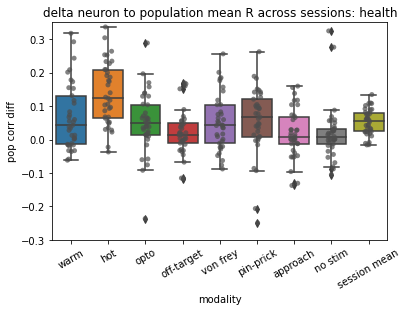

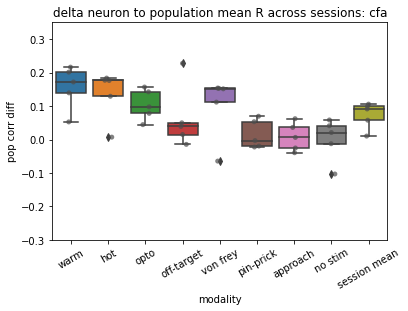

In [32]:
# calculate pre/post difference of single neuron to population mean correlation
ses_ave = pd.read_csv(os.path.join(output_path, 'population correlation session means.csv'), index_col=0)
pop_pre = np.array(ses_ave[ses_ave['pre/post']=='pre']['mean population R'])
pop_post = np.array(ses_ave[ses_ave['pre/post']=='post']['mean population R'])
pop_diff = pop_post - pop_pre
pop_diffs = ses_ave[ses_ave['pre/post']=='pre'].drop(['pre/post', 'mean population R'], axis=1)
pop_diffs['pop corr diff'] = pop_diff
pop_diffs.to_csv(os.path.join(output_path, 'population R differences pre_post.csv'))

health = pop_diffs.loc[pop_diffs['session'].str.contains('Ses')]
cfa = pop_diffs.loc[pop_diffs ['session'].str.contains('CFA')]

ax = sns.stripplot(x="modality", y="pop corr diff", data=health, color='.3', alpha=0.7, dodge=True)
ax = sns.boxplot(x="modality", y="pop corr diff", data=health)
#ax.legend(bbox_to_anchor= (1.2,1))
ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(-0.3,0.35)
ax.set(title='delta neuron to population mean R across sessions: health')
plt.savefig(os.path.join(output_path, 'delta neuron to population mean R by session health.png'), bbox_inches='tight')
plt.show()

ax = sns.stripplot(x="modality", y="pop corr diff", data=cfa, color='.3', alpha=0.7, dodge=True)
ax = sns.boxplot(x="modality", y="pop corr diff", data=cfa)
#ax.legend(bbox_to_anchor= (1.2,1))
ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(-0.3,0.35)
ax.set(title='delta neuron to population mean R across sessions: cfa')
plt.savefig(os.path.join(output_path, 'delta neuron to population mean R by session cfa.png'), bbox_inches='tight')
plt.show()




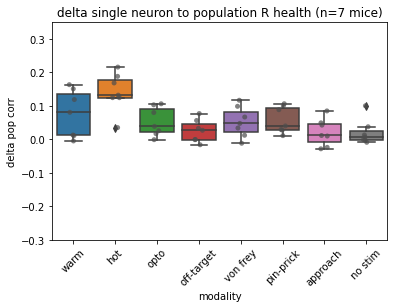

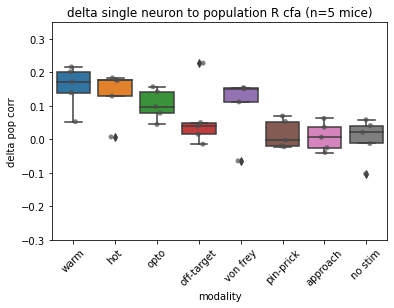

In [33]:
# Averaging across mice for health group
stats_health = []
cols = ['mouse', 'modality', 'delta pop corr']
mice = ['2P05', '2P06','2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = health[health['session'].str.contains(m)]
    for s in stimuli:
        delta_pop = by_mouse[by_mouse['modality']==s]['pop corr diff'].mean()
        stats = [m, s, delta_pop]
        stats_health.append(stats)
    
stats_health = pd.DataFrame(stats_health, columns = cols)
stats_health.to_csv(os.path.join(output_path, 'stats by mouse health 99 long.csv'))
ax = sns.stripplot(x='modality', y='delta pop corr', data=stats_health, color='.3', alpha=0.7)
ax = sns.boxplot(x='modality', y='delta pop corr', data=stats_health)
plt.xticks(rotation=45)
ax.legend([],[], frameon=False)
plt.ylim(-0.3, 0.35)
plt.title('delta single neuron to population R health (n=7 mice)')
plt.savefig(os.path.join(output_path, 'delta neuron to pop R health by mouse.png'), bbox_inches='tight')
plt.show()

stats_cfa = []
cols = ['mouse', 'modality', 'delta pop corr']
mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = cfa[cfa['session'].str.contains(m)]
    for s in stimuli:
        delta_pop = by_mouse[by_mouse['modality']==s]['pop corr diff'].mean()
        stats = [m, s, delta_pop]
        stats_cfa.append(stats)
    
stats_cfa = pd.DataFrame(stats_cfa, columns = cols)
stats_cfa.to_csv(os.path.join(output_path, 'stats by mouse cfa 99 long.csv'))
ax = sns.stripplot(x='modality', y='delta pop corr', data=stats_cfa, color='.3', alpha=0.7)
ax = sns.boxplot(x='modality', y='delta pop corr', data=stats_cfa)
plt.xticks(rotation=45)
ax.legend([],[], frameon=False)
plt.ylim(-0.3, 0.35)
plt.title('delta single neuron to population R cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'delta neuron to pop R health cfa by mouse.png'), bbox_inches='tight')
plt.show()



In [34]:
print('friedman modality health: ', pg.friedman(data=stats_health, dv="delta pop corr", within="modality", subject='mouse'))

sp.posthoc_conover_friedman(a=stats_health, y_col="delta pop corr", group_col="modality", block_col="mouse", 
                                 p_adjust="fdr_bh", melted=True)



friedman modality health:              Source         W  ddof1          Q     p-unc
Friedman  modality  0.466472      7  22.857143  0.001805


,warm,hot,opto,off-target,von frey,pin-prick,approach,no stim
warm,1.000000,0.240111,0.738183,0.295985,0.738183,0.951787,0.263828,0.330540
hot,0.240111,1.000000,0.093706,0.012872,0.093706,0.240111,0.012872,0.012872
opto,0.738183,0.093706,1.000000,0.502434,1.000000,0.715530,0.410039,0.523720
off-target,0.295985,0.012872,0.502434,1.000000,0.502434,0.291451,0.936869,0.951787
von frey,0.738183,0.093706,1.000000,0.502434,1.000000,0.715530,0.410039,0.523720
pin-prick,0.951787,0.240111,0.715530,0.291451,0.715530,1.000000,0.240111,0.295985
approach,0.263828,0.012872,0.410039,0.936869,0.410039,0.240111,1.000000,0.883118
no stim,0.330540,0.012872,0.523720,0.951787,0.523720,0.295985,0.883118,1.000000


In [35]:
print('friedman modality cfa: ', pg.friedman(data=stats_cfa, dv="delta pop corr", within="modality", subject='mouse'))

sp.posthoc_conover_friedman(a=stats_cfa, y_col="delta pop corr", group_col="modality", block_col="mouse", 
                                 p_adjust="fdr_bh", melted=True)

friedman modality cfa:              Source         W  ddof1     Q     p-unc
Friedman  modality  0.554286      7  19.4  0.007022


,warm,hot,opto,off-target,von frey,pin-prick,approach,no stim
warm,1.000000,0.748134,0.449744,0.227402,0.346238,0.123659,0.123659,0.123659
hot,0.748134,1.000000,0.636366,0.330421,0.449744,0.169949,0.123659,0.183831
opto,0.449744,0.636366,1.000000,0.600957,0.748134,0.330421,0.227402,0.346238
off-target,0.227402,0.330421,0.600957,1.000000,0.740585,0.636366,0.449744,0.703989
von frey,0.346238,0.449744,0.748134,0.740585,1.000000,0.449744,0.330421,0.449744
pin-prick,0.123659,0.169949,0.330421,0.636366,0.449744,1.000000,0.748134,0.905293
approach,0.123659,0.123659,0.227402,0.449744,0.330421,0.748134,1.000000,0.740585
no stim,0.123659,0.183831,0.346238,0.703989,0.449744,0.905293,0.740585,1.000000


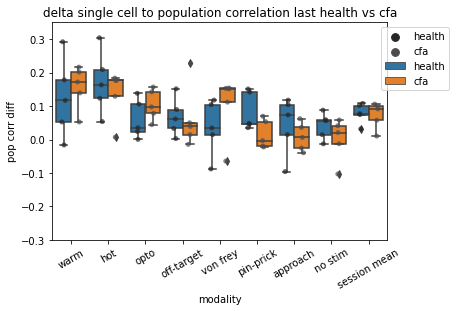

,Source,W,ddof1,Q,p-unc
Friedman,modality,0.510667,8,20.426667,0.008837


In [36]:
# STATS TO COMPARE LAST SESSION TO CFA

last_session = ['2P07_Ses07','2P08_Ses06',  '2P09_Ses05', '2P10_Ses05', '2P11_Ses06']
#pop_diffs = pd.read_csv(os.path.join(output_path, 'population R differences pre_post.csv'), index_col=0)
pop_diffs['mouse'] = pop_diffs['session'].apply(lambda x: x[:4])
pop_diffs['cfa'] = pop_diffs['session'].apply(lambda x: 'cfa' if 'CFA' in x else 'health')

df = pop_diffs[pop_diffs['session'].str.contains('CFA')|pop_diffs['session'].isin(last_session)]

# Plot delta single cell to population correlation for health & cfa
ax = sns.stripplot(x="modality", y="pop corr diff", hue='cfa', data=df, color='.3', alpha=0.7, dodge=True)
ax = sns.boxplot(x="modality", y="pop corr diff", hue='cfa', data=df)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(-0.3,0.35)
ax.set(title='delta single cell to population correlation last health vs cfa')
plt.savefig(os.path.join(output_path, 'delta pop corr last health vs cfa.png'), bbox_inches='tight')
plt.show()

#df.to_csv(os.path.join(output_path, 'pop_corr_lastSes_CFA_for_ANOVA.csv'))
pg.friedman(data=df, dv="pop corr diff", within="modality", subject="mouse")

In [37]:
pg.friedman(data=df, dv="pop corr diff", within="cfa", subject="mouse")

,Source,W,ddof1,Q,p-unc
Friedman,cfa,0.36,1,1.8,0.179712


In [38]:
# WILCOXON ON LAST SESSION VS CFA FOR EACH MODALITY
warm_h = df[(df['modality']=='warm') & (df['cfa']=='health')]['pop corr diff']
hot_h = df[(df['modality']=='hot') & (df['cfa']=='health')]['pop corr diff']
off_target_h = df[(df['modality']=='off-target') & (df['cfa']=='health')]['pop corr diff']
von_frey_h = df[(df['modality']=='von frey') & (df['cfa']=='health')]['pop corr diff']
pin_prick_h = df[(df['modality']=='pin-prick') & (df['cfa']=='health')]['pop corr diff']
approach_h = df[(df['modality']=='approach') & (df['cfa']=='health')]['pop corr diff']
opto_h = df[(df['modality']=='opto') & (df['cfa']=='health')]['pop corr diff']
no_stim_h = df[(df['modality']=='no stim') & (df['cfa']=='health')]['pop corr diff']

warm_c = df[(df['modality']=='warm') & (df['cfa']=='cfa')]['pop corr diff']
hot_c = df[(df['modality']=='hot') & (df['cfa']=='cfa')]['pop corr diff']
off_target_c = df[(df['modality']=='off-target') & (df['cfa']=='cfa')]['pop corr diff']
von_frey_c = df[(df['modality']=='von frey') & (df['cfa']=='cfa')]['pop corr diff']
pin_prick_c = df[(df['modality']=='pin-prick') & (df['cfa']=='cfa')]['pop corr diff']
approach_c = df[(df['modality']=='approach') & (df['cfa']=='cfa')]['pop corr diff']
opto_c = df[(df['modality']=='opto') & (df['cfa']=='cfa')]['pop corr diff']
no_stim_c = df[(df['modality']=='no stim') & (df['cfa']=='cfa')]['pop corr diff']

from scipy.stats import wilcoxon

d = np.array(warm_h) - np.array(warm_c)
res = wilcoxon(d)
print('warm delta single cell to population correlation: ', res.statistic, res.pvalue)

d = np.array(hot_h) - np.array(hot_c)
res = wilcoxon(d)
print('hot delta single cell to population correlation: ', res.statistic, res.pvalue)

d = np.array(off_target_h) - np.array(off_target_c)
res = wilcoxon(d)
print('off target delta single cell to population correlation: ', res.statistic, res.pvalue)

d = np.array(von_frey_h) - np.array(von_frey_c)
res = wilcoxon(d)
print('von frey delta single cell to population correlation: ', res.statistic, res.pvalue)

d = np.array(pin_prick_h) - np.array(pin_prick_c)
res = wilcoxon(d)
print('pin-prick delta single cell to population correlation: ', res.statistic, res.pvalue)

d = np.array(approach_h) - np.array(approach_c)
res = wilcoxon(d)
print('approach delta single cell to population correlation: ', res.statistic, res.pvalue)

d = np.array(opto_h) - np.array(opto_c)
res = wilcoxon(d)
print('opto delta single cell to population correlation: ', res.statistic, res.pvalue)

d = np.array(no_stim_h) - np.array(no_stim_c)
res = wilcoxon(d)
print('no stimulation delta single cell to population correlation: ', res.statistic, res.pvalue)

warm delta single cell to population correlation:  5.0 0.625
hot delta single cell to population correlation:  5.0 0.625
off target delta single cell to population correlation:  6.0 0.8125
von frey delta single cell to population correlation:  0.0 0.0625
pin-prick delta single cell to population correlation:  1.0 0.125
approach delta single cell to population correlation:  5.0 0.625
opto delta single cell to population correlation:  4.0 0.4375
no stimulation delta single cell to population correlation:  1.0 0.125


In [39]:
pop_diffs.head()

,session,modality,mouse,cfa,pop corr diff
0,2P06_Ses01,warm,2P06,health,-0.058506
2,2P06_Ses01,hot,2P06,health,0.048240
4,2P06_Ses01,opto,2P06,health,0.038150
6,2P06_Ses01,off-target,2P06,health,-0.032882
8,2P06_Ses01,von frey,2P06,health,-0.020664


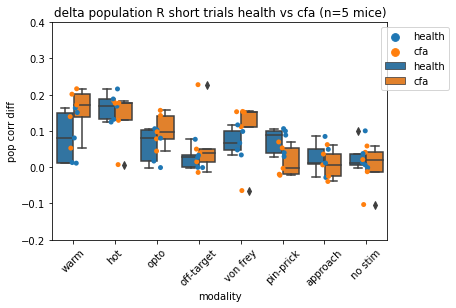

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.04      1  0.2  0.654721
            Source         W  ddof1     Q     p-unc
Friedman  modality  0.685714      7  24.0  0.001139
von frey delta population R:  5.0 0.625
no stim delta population R:  5.0 0.625


In [42]:
# STATS TO COMPARE DELTA R HEALTH TO CFA (CFA MICE ONLY)

stats_list = []
cols = ['mouse', 'modality', 'cfa', 'pop corr diff']
mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = pop_diffs.loc[pop_diffs['session'].str.contains(m)]
    for s in stimuli:
        health = by_mouse.loc[(by_mouse['modality']==s)&(by_mouse['cfa']=='health')]['pop corr diff'].mean()
        cfa = by_mouse.loc[(by_mouse['modality']==s)&(by_mouse['cfa']=='cfa')]['pop corr diff'].mean()
        stats = [m, s, 'health', health]
        stats_list.append(stats)
        stats = [m, s, 'cfa', cfa]
        stats_list.append(stats)
   
stats_df = pd.DataFrame(stats_list, columns = cols)
stats_df.to_csv(os.path.join(output_path, 'stats by mouse delta population R short trial 3sec.csv'))
ax = sns.stripplot(x='modality', y='pop corr diff', hue='cfa', data=stats_df)
ax = sns.boxplot(x='modality', y='pop corr diff', hue='cfa', data=stats_df)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
plt.ylim(-0.2, 0.4)
plt.title('delta population R short trials health vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'delta population R short trials health vs cfa (n=5).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=stats_df, dv="pop corr diff", within="cfa", subject="mouse"))
print(pg.friedman(data=stats_df, dv="pop corr diff", within="modality", subject="mouse"))

VF_health = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='health')]
VF_cfa = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='cfa')]
d = np.array(VF_health['pop corr diff']) - np.array(VF_cfa['pop corr diff'])
res = wilcoxon(d)
print('von frey delta population R: ', res.statistic, res.pvalue)

noStim_health = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='health')]
noStim_cfa = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='cfa')]
d = np.array(noStim_health['pop corr diff']) - np.array(noStim_cfa['pop corr diff'])
res = wilcoxon(d)
print('no stim delta population R: ', res.statistic, res.pvalue)


